In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl

In [2]:
data = pd.read_csv("data-produksi-benih-ikan-di-provinsi-dki-jakarta-tahun-2017-2019.csv")

In [3]:
data.head(24)

,tahun,jenis_ikan,jenis_budidaya,produksi
0,2017,Mas,1,70
1,2017,Nila,1,52
2,2017,Gurame,1,64
3,2017,Patin,1,18
4,2017,Lele,1,15
5,2017,Kerapu Bebek,0,47
6,2017,Kerapu Macan,0,20
7,2017,Kerapu Hybrid,0,83
8,2017,Kakap Putih,0,17
9,2017,Bawal Bintang,0,55


In [16]:
atributData = data.iloc[:,:-1].values
labelData = data.iloc[:,-1].values

In [15]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mean.fit(atributData[:,:-1])
atributData[:,:-1] = imp_mean.transform(atributData[:,:-1])

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(atributData, labelData, test_size=0.25, random_state=0)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [21]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [22]:
y_pred = classifier.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.0

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]])

In [25]:
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

Bawal Bintang       0.00      0.00      0.00       0.0
       Gurame       0.00      0.00      0.00       1.0
 Ikan Lainnya       0.00      0.00      0.00       1.0
         Nila       0.00      0.00      0.00       1.0
 Udang Vaname       0.00      0.00      0.00       2.0
  Udang Windu       0.00      0.00      0.00       1.0

     accuracy                           0.00       6.0
    macro avg       0.00      0.00      0.00       6.0
 weighted avg       0.00      0.00      0.00       6.0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

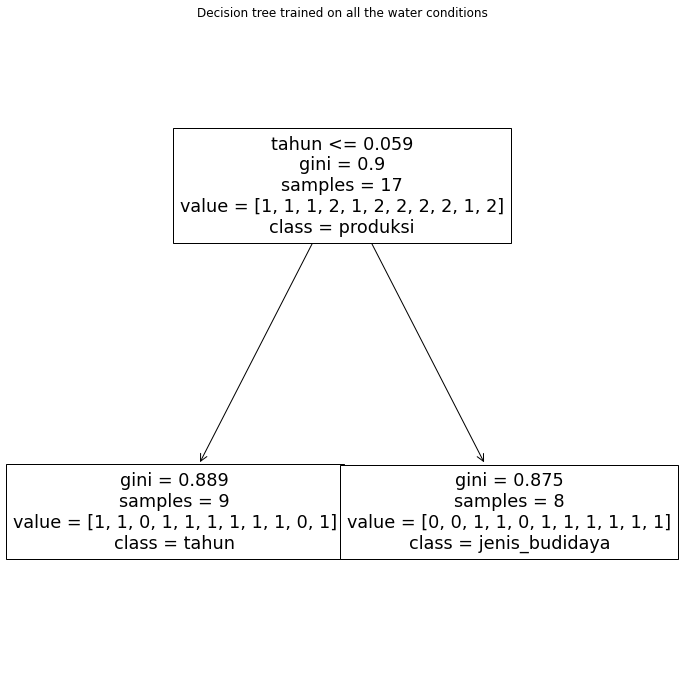

In [28]:
pl.figure(figsize=(12,12))
tree.plot_tree(classifier, feature_names=data.columns.values.tolist(), class_names=data.columns.values.tolist())
pl.title("Decision tree trained on all the water conditions")
pl.show()